## Automated Plant Phenotyping
### Context
##### Understanding how the genetics of plants interact with their environment to produce certain chateristics or 'phenotypes' is critical to understand how they might grow under different conditions. In relation to agriculture, extracting accurate data on pehnotype may help us to better manage plants to produce higher-yield, more resilient crops, and plan for future food security by predicting how crops may grow under various climate change scenarios.

##### State-of-the-art plant phenotyping platforms have recently been established in the UK, such as the [National Plant Phenomics Centre](https://www.plant-phenomics.ac.uk/) that collect high spatiotemporal resolution imagery of plants, as well as data on plant genetics and environmental conditions. However, extracting phenomic data from these images is expensive and time consuming to carry out manually. 

##### We are working with the NPPC to automate extraction of plant phenotype data from various datasets, one of which is comprised of time-series images of individual brassica napus plants. We want to track the change and emergence of different plant structures (such as leaves, flowers, branches and seed pods) over time. 

##### In this notebook we use the `scivision` Python API to load example plant data (at individual and satellite scale) and perform inference with `MapReader` model trained on NPPC images of individual brassica plants. `MapReader` (https://github.com/Living-with-machines/MapReader) is an end-to-end computer vision (CV) pipeline developed to analyse historical maps as scale, using a patch classification approach to to identify landscape features i.e. railways and buldings and examine change in these classes over time. The aim of the `mapreader-plant` model is to classify different parts of plants and track how they change over time in a similar fashion. 

## Load `scivision`
#### To start, let's load the core `scivision` modules relevant to this notebook

In [1]:
from scivision import default_catalog, load_pretrained_model, load_dataset
import matplotlib.pyplot as plt

## Retrieve `mapreader-plant` model from scivision catalog

In [2]:
# Get the model repo url
models_catalog = default_catalog.models.to_dataframe()
stp_repo = models_catalog[models_catalog.name == "mapreader-plant"].url.item()
stp_repo # Why not paste the repo link into your browser and see how it looks?

FlexibleUrl('https://github.com/alan-turing-institute/mapreader-plant-scivision', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/mapreader-plant-scivision')

## Loading the `mapreader-plant` model

In [3]:
model = load_pretrained_model(stp_repo, allow_install=True)
model

  Cloning https://github.com/alan-turing-institute/mapreader-plant-scivision (to revision main) to /private/var/folders/xr/xjkpw26d2gqgfzz06tkmfr5c0000gr/T/pip-install-zh5pgap_/mapreader-plant-scivision_93904f0447fb4f509ea77884bed9ea7a


  Running command git clone --filter=blob:none --quiet https://github.com/alan-turing-institute/mapreader-plant-scivision /private/var/folders/xr/xjkpw26d2gqgfzz06tkmfr5c0000gr/T/pip-install-zh5pgap_/mapreader-plant-scivision_93904f0447fb4f509ea77884bed9ea7a


  Resolved https://github.com/alan-turing-institute/mapreader-plant-scivision to commit aa105ef77da359d4823390df4297288933f33768
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/Living-with-machines/MapReader.git (to revision b1be3afab8da7821bf1a0332acd4872e16bca570) to /private/var/folders/xr/xjkpw26d2gqgfzz06tkmfr5c0000gr/T/pip-install-zh5pgap_/mapreader_7b9660b55a564d38b79a0a703ca7c015


  Running command git clone --filter=blob:none --quiet https://github.com/Living-with-machines/MapReader.git /private/var/folders/xr/xjkpw26d2gqgfzz06tkmfr5c0000gr/T/pip-install-zh5pgap_/mapreader_7b9660b55a564d38b79a0a703ca7c015
  Running command git rev-parse -q --verify 'sha^b1be3afab8da7821bf1a0332acd4872e16bca570'
  Running command git fetch -q https://github.com/Living-with-machines/MapReader.git b1be3afab8da7821bf1a0332acd4872e16bca570
  Running command git checkout -q b1be3afab8da7821bf1a0332acd4872e16bca570


  Resolved https://github.com/Living-with-machines/MapReader.git to commit b1be3afab8da7821bf1a0332acd4872e16bca570
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.7/280.7 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.3/359.3 kB 

scivision.PretrainedModel( 
  module='mapreader-plant-scivision', 
  model='MapReader_model', 
  source='https://github.com/alan-turing-institute/mapreader-plant-scivision.git' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "path2images: str">)' 
)

## Load example data

#### In this case we want to load image data stored in an github respository that follows [this template](https://scivision.readthedocs.io/en/latest/model_repository_template.html) and is described with a `.scivision/data.yml` file

In [4]:
data_config = load_dataset('https://github.com/alan-turing-institute/mapreader-plant-scivision')
data_config

data:
  args:
    path: https://raw.githubusercontent.com/alan-turing-institute/mapreader-plant-scivision/main/.scivision/data.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


#### We want to use the `plant_flower` data source listed in the `.scivision/data.yml`

### Retrieve `plant_flower` data in xarray format accepted by `mapreader-plant` model

In [5]:
plant_flower = data_config.plant_flower().to_dask()
plant_flower

<xarray.DataArray 'imread-7cc253a1a866b0b01aa25e6680cbae93' (concat_dim: 2,
                                                             y: 2056, x: 2454,
                                                             channel: 4)>
dask.array<imread, shape=(2, 2056, 2454, 4), dtype=uint8, chunksize=(1, 2056, 2454, 4), chunktype=numpy.ndarray>
Coordinates:
  * concat_dim  (concat_dim) int64 0 1
  * y           (y) int64 0 1 2 3 4 5 6 7 ... 2049 2050 2051 2052 2053 2054 2055
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 2447 2448 2449 2450 2451 2452 2453
  * channel     (channel) int64 0 1 2 3

### Plot image from loaded dataset

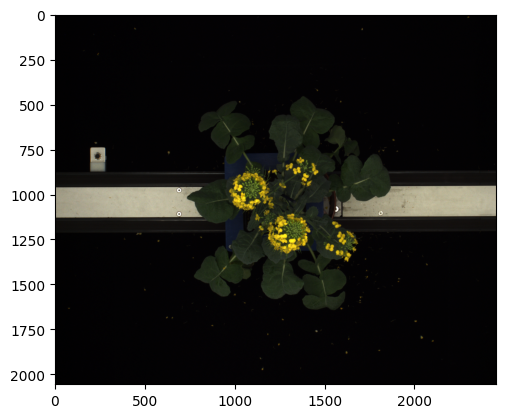

In [6]:
plt.imshow(plant_flower[1])

## Model predictions

#### Use `mapreader-plant` model to classify plant patches in example image

#### This model produces an image showing the label assigned to each patch, and table of confidence scores for label predictions

#### We add the additional argument `slice_size=25` to specify that we want to use smaller 25 by 25 pixel patches, which this version of `mapreader-plant` was trained on, rather than the default `mapreader` patch size of 100 by 100 pixels

Slicing mr_tmp_1677164972/orig_image.png
----------------------------------------
[INFO] added 'infer_test' dataloader with 8217 elements.
2023-02-23 15:11:11 MAC-ATI114 [INFO] infer_test -- 11/11 --     64/8217 (  0.8%) -- 
2023-02-23 15:12:58 MAC-ATI114 [INFO] infer_test -- 11/11 --    384/8217 (  4.7%) -- 
2023-02-23 15:14:50 MAC-ATI114 [INFO] infer_test -- 11/11 --    704/8217 (  8.6%) -- 
2023-02-23 15:16:40 MAC-ATI114 [INFO] infer_test -- 11/11 --   1024/8217 ( 12.5%) -- 
2023-02-23 15:18:28 MAC-ATI114 [INFO] infer_test -- 11/11 --   1344/8217 ( 16.4%) -- 
2023-02-23 15:20:17 MAC-ATI114 [INFO] infer_test -- 11/11 --   1664/8217 ( 20.3%) -- 
2023-02-23 15:22:07 MAC-ATI114 [INFO] infer_test -- 11/11 --   1984/8217 ( 24.1%) -- 
2023-02-23 15:23:59 MAC-ATI114 [INFO] infer_test -- 11/11 --   2304/8217 ( 28.0%) -- 
2023-02-23 15:25:52 MAC-ATI114 [INFO] infer_test -- 11/11 --   2624/8217 ( 31.9%) -- 
2023-02-23 15:27:44 MAC-ATI114 [INFO] infer_test -- 11/11 --   2944/8217 ( 35.8%) -- 
2

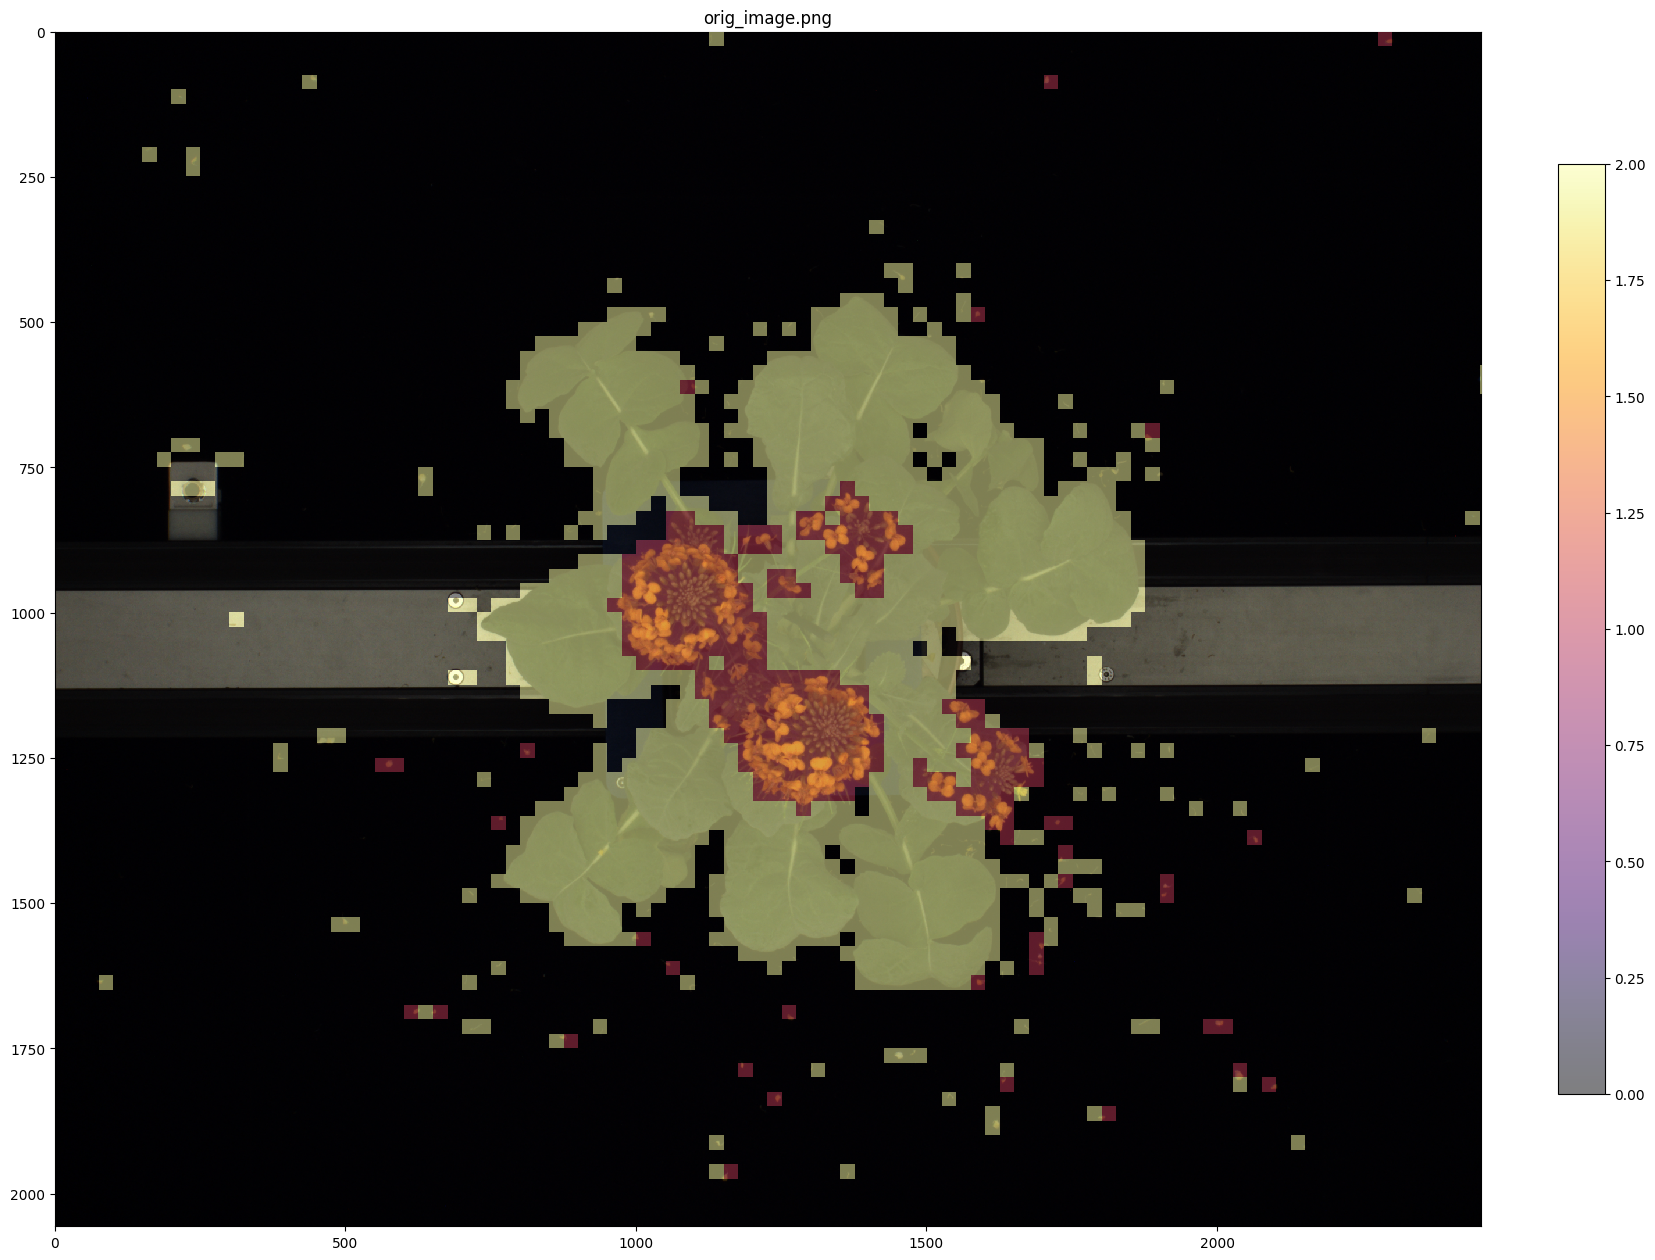

image_path  pred      conf  \
0     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.993229   
1     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.992572   
2     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.992605   
3     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.985746   
4     /Users/ifenton/Documents/Projects/SciVision/Ex...     2  0.999998   
...                                                 ...   ...       ...   
8212  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.991656   
8213  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.992254   
8214  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.990436   
8215  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.990996   
8216  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.986352   

                                                name  
0           patch-875-50-900-75-#orig_image.png#.PNG  
1     patch-1450-2000-1475-2025-#orig_image.png#.PNG  
2     patch-2050-1650-2075-1675-#orig_image.png#.PNG  
3       patch-1925-525-1950-550-#orig_image.png#.PNG  
4     patch-1225-1550-1250-1575-#orig_image.png#.PNG  
...                                              ...  
8212  patch-2350-1800-2375-1825-#orig_image.png#.PNG  
8213      patch-50-1650-75-1675-#orig_image.png#.PNG  
8214  patch-1050-1975-1075-2000-#orig_image.png#.PNG  
8215      patch-150-350-175-375-#orig_image.png#.PNG  
8216  patch-1900-1500-1925-1525-#orig_image.png#.PNG  

[8217 rows x 4 columns]

In [7]:
model.predict(plant_flower[1], slice_size=25)

## Let's try the `mapreader-plant` model on some new and different data!

#### Query `scivision` catalog for compatible datasources

In [8]:
compatible_datasources = default_catalog.compatible_datasources("mapreader-plant").to_dataframe()
compatible_datasources

name  \
0          stardist-cell-nuclei-2D   
1                   oppd-seedlings   
2              scivision-test-data   
3                   cefas-plankton   
4                    coastal-edges   
5                       treecrowns   
6                   sentinel2_stac   
7                          flowers   
8                      butterflies   
9                         Parakeet   
10            cell-cycle-scivision   
12  MapReader_Data_SIGSPATIAL_2022   

                                          description  \
0   Cell microscopy test dataset for detection and...   
1   The Open Plant Phenotyping Database [OPPD] is ...   
2   Test data comprised of individual images inclu...   
3   Sample dataset of Plankton required to demonst...   
4   Sample dataset of satellite RGB imagery over t...   
5   Sample dataset of drone RGB imagery over Sepil...   
6   Data plugin for accessing Sentinel-2 Cloud-Opt...   
7   The 102 flowers dataset, created by Visual Geo...   
8   The Butterfly Image Classification Kaggle chal...   
9                 Synthetic cryoEM data from Parakeet   
10     Crops of H2B-FP stained nuclei in MDCK cells.    
12  Here we share gold standard annotations and ou...   

                                                tasks  labels_provided  \
0   (TaskEnum.object_detection, TaskEnum.segmentat...             True   
1   (TaskEnum.segmentation, TaskEnum.object_detect...             True   
2   (TaskEnum.object_detection, TaskEnum.classific...             True   
3                          (TaskEnum.classificiation)             True   
4   (TaskEnum.classificiation, TaskEnum.segmentation)            False   
5   (TaskEnum.object_detection, TaskEnum.segmentat...            False   
6   (TaskEnum.classificiation, TaskEnum.segmentation)            False   
7                          (TaskEnum.classificiation)             True   
8                          (TaskEnum.classificiation)             True   
9   (TaskEnum.classificiation, TaskEnum.object_det...            False   
10                         (TaskEnum.classificiation)             True   
12                         (TaskEnum.classificiation)             True   

                                          domains  \
0                           (optical-microscopy,)   
1                  (multispectral, hyperspectral)   
2                              (computer-vision,)   
3                              (computer-vision,)   
4   (computer-vision, earth-observation, ecology)   
5   (computer-vision, earth-observation, ecology)   
6   (computer-vision, earth-observation, ecology)   
7                      (computer-vision, ecology)   
8                      (computer-vision, ecology)   
9                                            None   
10             (optical microscopy, cell biology)   
12                      (history, urban-planning)   

                                                  url format  \
0   https://github.com/stardist/stardist/releases/...  image   
1   https://github.com/alan-turing-institute/oppd-...  image   
2   https://github.com/alan-turing-institute/scivi...  image   
3   https://raw.githubusercontent.com/alan-turing-...  image   
4   https://github.com/MartinSJRogers/VEdge_Detect...  image   
5   https://github.com/shmh40/detectreeRGB-treecro...  image   
6   https://github.com/alan-turing-institute/scivi...  image   
7     https://github.com/nbarlowATI/flowers_data_repo  image   
8   https://github.com/nbarlowATI/butterfly_data_repo  image   
9   https://github.com/rosalindfranklininstitute/s...  image   
10  https://github.com/lowe-lab-ucl/cell-cycle-sci...  image   
12  https://github.com/alan-turing-institute/mapre...  image   

                                          institution  \
0                                             (epfl,)   
1                                (Aarhus University,)   
2                         (Wikipedia by Erik Veland,)   
3   (Centre for Environment, Fisheries and Aquacul...   
4                     

#### We will load data from the vegetation edge detection use case (https://github.com/scivision-gallery/coastalveg-edge-detection)

In [11]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'coastal-edges']
target_datasource

name                                        description  \
4  coastal-edges  Sample dataset of satellite RGB imagery over t...   

                                               tasks  labels_provided  \
4  (TaskEnum.classificiation, TaskEnum.segmentation)            False   

                                         domains  \
4  (computer-vision, earth-observation, ecology)   

                                                 url format  \
4  https://github.com/MartinSJRogers/VEdge_Detect...  image   

               institution                                               tags  
4  (Cambridge University,)  (2D, satellite, remote-sensing, ecology, envir...

In [12]:
data_url = target_datasource['url'].item()

In [13]:
data_config = load_dataset(data_url)
data_config

data:
  args:
    path: https://raw.githubusercontent.com/MartinSJRogers/VEdge_Detector_scivision/main/.scivision/data.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


#### we will use the `sample_image` data source from the `scivision/data.yml`

In [14]:
sample_image = data_config.sample_image(sample_image="winterton").to_dask()
sample_image

<xarray.DataArray (y: 1600, x: 1000, channel: 4)>
dask.array<xarray-<this-array>, shape=(1600, 1000, 4), dtype=uint8, chunksize=(1600, 1000, 4), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 1593 1594 1595 1596 1597 1598 1599
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 991 992 993 994 995 996 997 998 999
  * channel  (channel) int64 0 1 2 3

#### Plot the example image

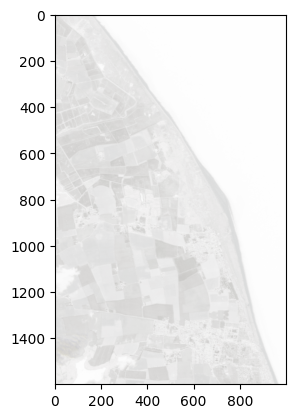

In [15]:
plt.imshow(sample_image)

#### Predict whether 25 x 25 pixel patches in example image contain background (label = 0), flower (label = 1), or non-flower plant structures (label = 2)

In [16]:
model = load_pretrained_model(stp_repo, allow_install=True)
model

[INFO] Download model from: https://github.com/alan-turing-institute/mapreader-plant-scivision/raw/main/mapreader-plant-scivision/checkpoint_10.pkl
[INFO] Save model         : ./mr_tmp_1677168059/checkpoint.pkl
[INFO] Download model from: https://github.com/alan-turing-institute/mapreader-plant-scivision/raw/main/mapreader-plant-scivision/model_checkpoint_10.pkl
[INFO] Save model         : ./mr_tmp_1677168059/model_checkpoint.pkl
[INFO] Device is set to cpu


scivision.PretrainedModel( 
  module='mapreader-plant-scivision', 
  model='MapReader_model', 
  source='https://github.com/alan-turing-institute/mapreader-plant-scivision.git' 
  pipe='DataPipe(input=<Parameter "X: numpy.ndarray">, output=<Parameter "path2images: str">)' 
)

Slicing mr_tmp_1677168059/orig_image.png
----------------------------------------
[INFO] added 'infer_test' dataloader with 2560 elements.
2023-02-23 16:02:08 MAC-ATI114 [INFO] infer_test -- 11/11 --     64/2560 (  2.5%) -- 
2023-02-23 16:03:59 MAC-ATI114 [INFO] infer_test -- 11/11 --    384/2560 ( 15.0%) -- 
2023-02-23 16:05:53 MAC-ATI114 [INFO] infer_test -- 11/11 --    704/2560 ( 27.5%) -- 
2023-02-23 16:07:42 MAC-ATI114 [INFO] infer_test -- 11/11 --   1024/2560 ( 40.0%) -- 
2023-02-23 16:09:30 MAC-ATI114 [INFO] infer_test -- 11/11 --   1344/2560 ( 52.5%) -- 
2023-02-23 16:11:18 MAC-ATI114 [INFO] infer_test -- 11/11 --   1664/2560 ( 65.0%) -- 
2023-02-23 16:13:06 MAC-ATI114 [INFO] infer_test -- 11/11 --   1984/2560 ( 77.5%) -- 
2023-02-23 16:14:54 MAC-ATI114 [INFO] infer_test -- 11/11 --   2304/2560 ( 90.0%) -- 
Total time: 14m 32s


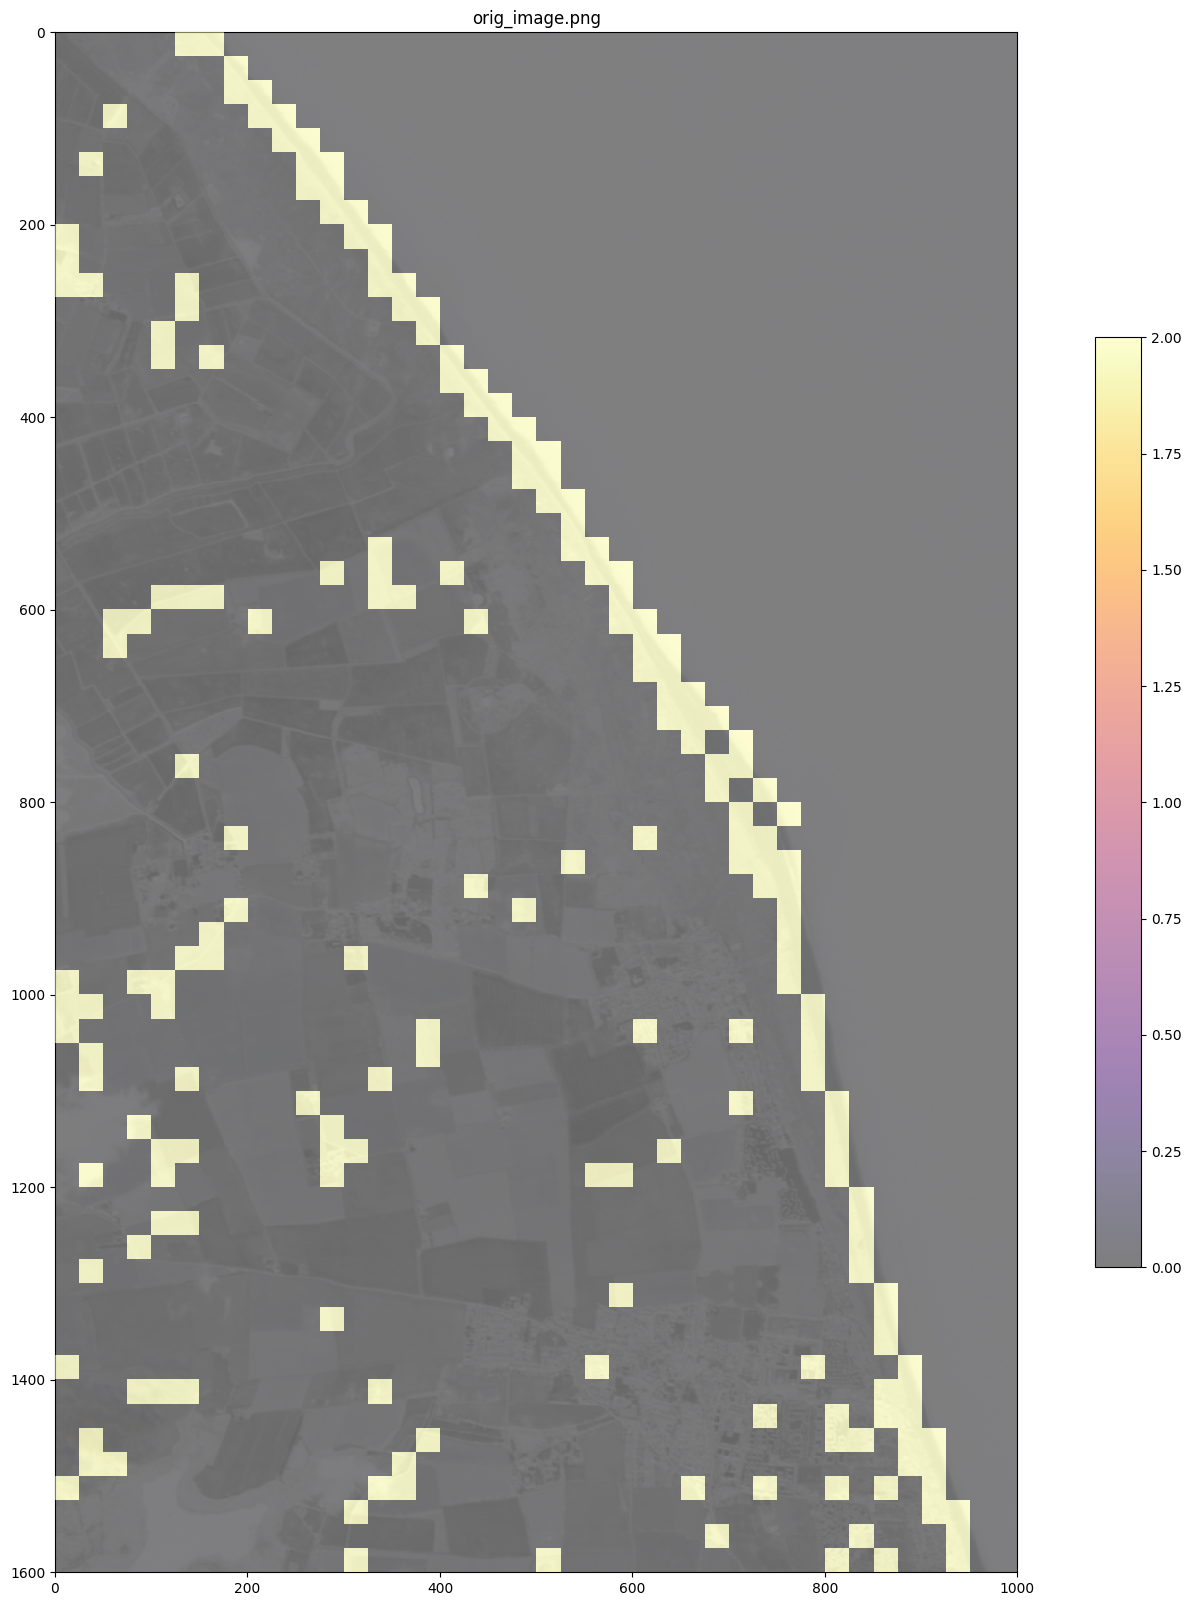

image_path  pred      conf  \
0     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998342   
1     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998359   
2     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998371   
3     /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.997300   
4     /Users/ifenton/Documents/Projects/SciVision/Ex...     2  0.913186   
...                                                 ...   ...       ...   
2555  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.928508   
2556  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998269   
2557  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998594   
2558  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998581   
2559  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.927883   

                                             name  
0        patch-875-50-900-75-#orig_image.png#.PNG  
1     patch-975-575-1000-600-#orig_image.png#.PNG  
2      patch-625-100-650-125-#orig_image.png#.PNG  
3      patch-275-525-300-550-#orig_image.png#.PNG  
4      patch-400-350-425-375-#orig_image.png#.PNG  
...                                           ...  
2555  patch-75-1425-100-1450-#orig_image.png#.PNG  
2556   patch-850-800-875-825-#orig_image.png#.PNG  
2557   patch-950-450-975-475-#orig_image.png#.PNG  
2558   patch-375-750-400-775-#orig_image.png#.PNG  
2559   patch-150-350-175-375-#orig_image.png#.PNG  

[2560 rows x 4 columns]

In [17]:
model.predict(sample_image, slice_size=25)

### Use the same pre-trained `mapreader-plant` model, but change patch size to 10 x 10 pixels

Slicing mr_tmp_1677168059/orig_image.png
----------------------------------------
[INFO] added 'infer_test' dataloader with 18560 elements.
2023-02-23 16:17:01 MAC-ATI114 [INFO] infer_test -- 11/11 --    64/18560 (  0.3%) -- 
2023-02-23 16:18:46 MAC-ATI114 [INFO] infer_test -- 11/11 --   384/18560 (  2.1%) -- 
2023-02-23 16:20:36 MAC-ATI114 [INFO] infer_test -- 11/11 --   704/18560 (  3.8%) -- 
2023-02-23 16:22:25 MAC-ATI114 [INFO] infer_test -- 11/11 --  1024/18560 (  5.5%) -- 
2023-02-23 16:24:13 MAC-ATI114 [INFO] infer_test -- 11/11 --  1344/18560 (  7.2%) -- 
2023-02-23 16:26:00 MAC-ATI114 [INFO] infer_test -- 11/11 --  1664/18560 (  9.0%) -- 
2023-02-23 16:27:46 MAC-ATI114 [INFO] infer_test -- 11/11 --  1984/18560 ( 10.7%) -- 
2023-02-23 16:29:31 MAC-ATI114 [INFO] infer_test -- 11/11 --  2304/18560 ( 12.4%) -- 
2023-02-23 16:31:17 MAC-ATI114 [INFO] infer_test -- 11/11 --  2624/18560 ( 14.1%) -- 
2023-02-23 16:33:03 MAC-ATI114 [INFO] infer_test -- 11/11 --  2944/18560 ( 15.9%) -- 


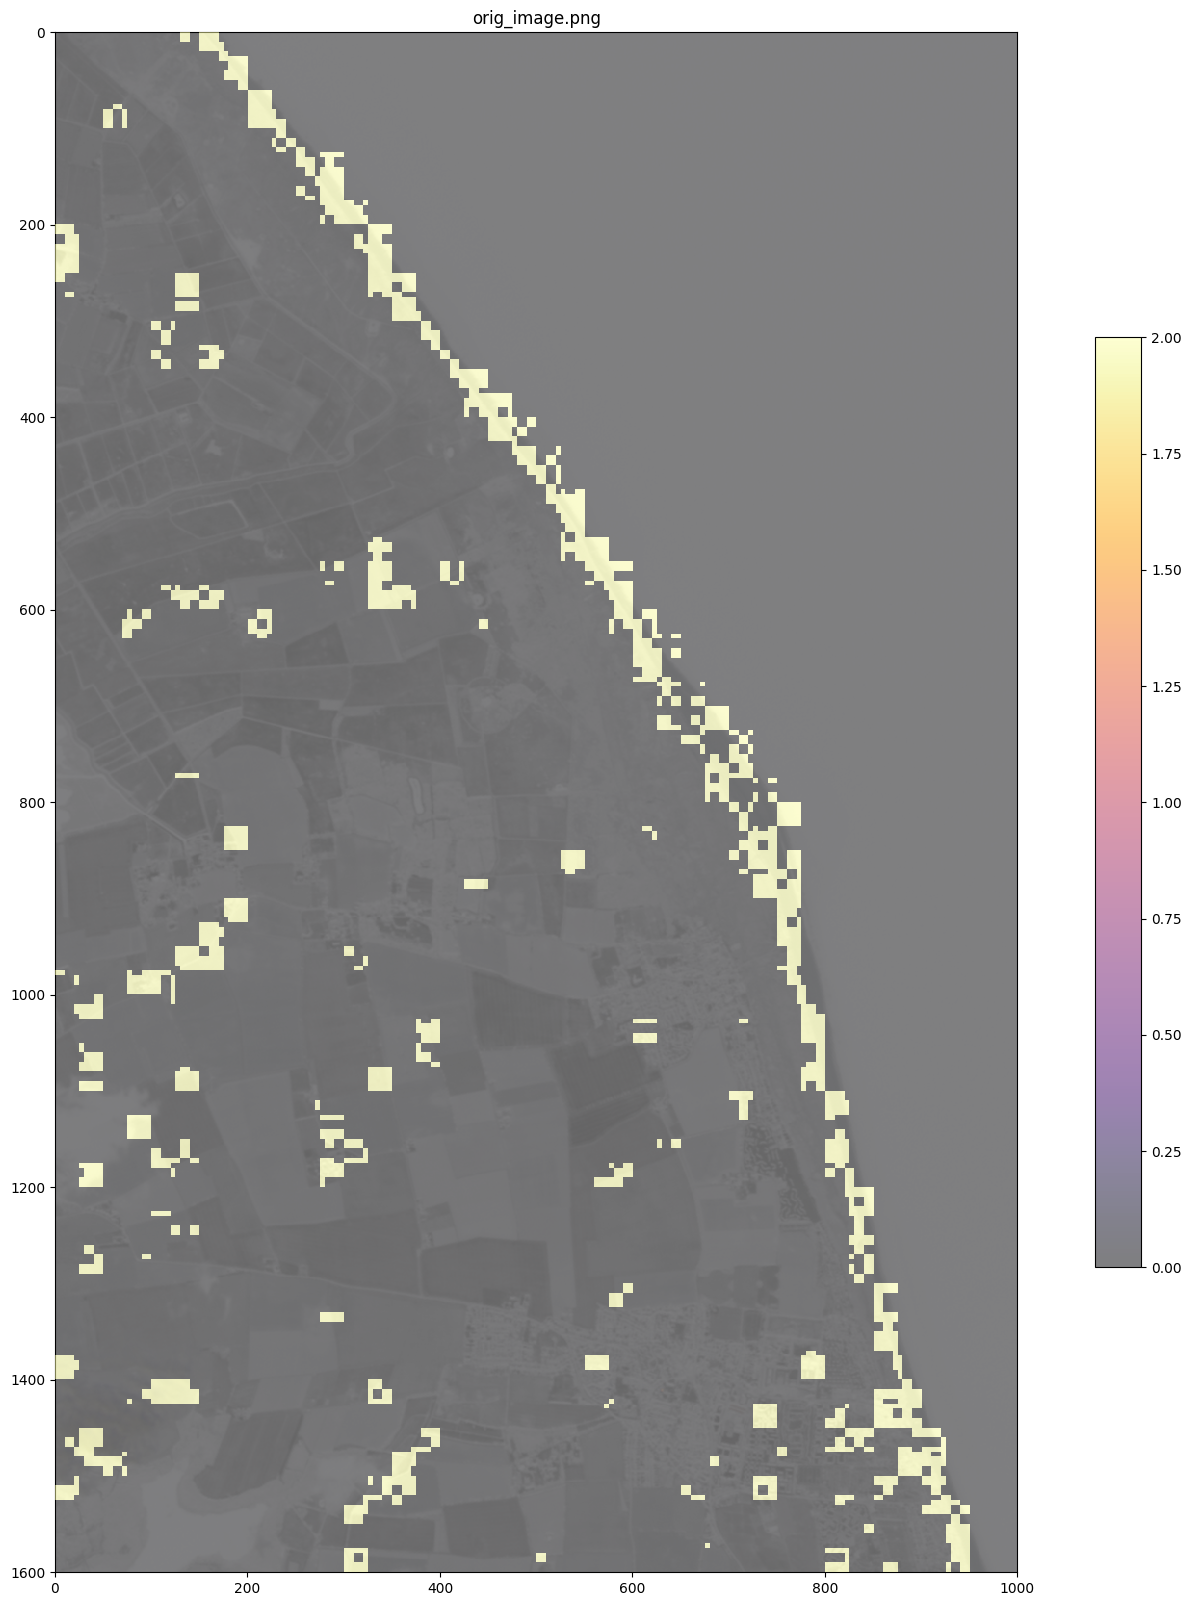

image_path  pred      conf  \
0      /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.991293   
1      /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998520   
2      /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998466   
3      /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.997960   
4      /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998339   
...                                                  ...   ...       ...   
18555  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998430   
18556  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.927883   
18557  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.996808   
18558  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.998116   
18559  /Users/ifenton/Documents/Projects/SciVision/Ex...     0  0.997581   

                                               name  
0        patch-70-1030-80-1040-#orig_image.png#.PNG  
1        patch-620-360-630-370-#orig_image.png#.PNG  
2        patch-820-200-830-210-#orig_image.png#.PNG  
3       patch-440-990-450-1000-#orig_image.png#.PNG  
4      patch-960-1500-970-1510-#orig_image.png#.PNG  
...                                             ...  
18555  patch-950-1200-960-1210-#orig_image.png#.PNG  
18556    patch-150-350-175-375-#orig_image.png#.PNG  
18557    patch-270-390-280-400-#orig_image.png#.PNG  
18558    patch-830-410-840-420-#orig_image.png#.PNG  
18559    patch-460-650-470-660-#orig_image.png#.PNG  

[18560 rows x 4 columns]

In [18]:
model.predict(sample_image, slice_size=10)